<a href="https://colab.research.google.com/github/mimomaina/machine-learning_002/blob/main/Second_hand_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np

In [47]:
df = pd.read_csv('/content/second_hand_cars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

In [48]:
df.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


# Data Cleaning

In [49]:
#unique values in Variant
df['Variant'].unique()

array(['EX', 'RXE', 'Highline', 'LE', nan, 'ZXI', 'GT', 'SL', 'SE', 'XL'],
      dtype=object)

In [50]:
#corresponding values in company name and variant
df.groupby('Variant')['Company Name'].unique()

,Company Name
Variant,
EX,"[Maruti Suzuki, Toyota, Hyundai, Ford, Kia, Ho..."
GT,"[Ford, Nissan, Volkswagen, Toyota, Maruti Suzu..."
Highline,"[Nissan, Chevrolet, Ford, Kia, Maruti Suzuki, ..."
LE,"[Volkswagen, Maruti Suzuki, Honda, Toyota, Kia..."
RXE,"[Kia, Hyundai, Honda, Maruti Suzuki, Renault, ..."
SE,"[Nissan, Kia, Maruti Suzuki, Volkswagen, Renau..."
SL,"[Renault, Volkswagen, Honda, Kia, Hyundai, Toy..."
XL,"[Renault, Volkswagen, Chevrolet, Nissan, Honda..."
ZXI,"[Volkswagen, Renault, Chevrolet, Maruti Suzuki..."


In [51]:
#variant mode
df['Variant'].mode()
#fill missing values with mode
df['Variant'].fillna(df['Variant'].mode()[0], inplace=True)

<ipython-input-51-81cd10344541>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Variant'].fillna(df['Variant'].mode()[0], inplace=True)


In [52]:
#accessories mode
df['Accessories'].mode()
#fill missing values with mode
df['Accessories'].fillna(df['Accessories'].mode()[0], inplace=True)

<ipython-input-52-929df8bd5aac>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Accessories'].fillna(df['Accessories'].mode()[0], inplace=True)


In [53]:
# Drop unnecessary columns
df.drop(columns=['Registration Number'], inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2500 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Mileage                   2500 non-null   int64 
 8   Price                     2500 non-null   int64 
 9   Transmission Type         2500 non-null   object
 10  Body Color                2500 non-null   object
 11  Service Record            2500 non-null   object
 12  Insurance                 2500 non-null   object
 13  Registration Certificate  2500 non-null   object
 14  Accessories             

# Feature Engineering

In [55]:
from datetime import datetime

# Create new features
current_year = datetime.now().year
df['Car Age'] = current_year - df['Make Year']
df['Price per Mile'] = df['Price'] / df['Mileage']

# Confirm new features
df[['Car Age', 'Price per Mile']].head()


,Car Age,Price per Mile
0,7,14.377571
1,5,11.634364
2,3,6.672219
3,1,6.865880
4,7,8.304536


# Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder


In [57]:
#1. Label Encoding for Company Name and Car Name
label_enc = LabelEncoder()
df['Company Name'] = label_enc.fit_transform(df['Company Name'])
df['Car Name'] = label_enc.fit_transform(df['Car Name'])

#2. One-Hot Encoding for Variant, Fuel Type, Transmission Type, and Body Color
df = pd.get_dummies(df, columns=['Variant', 'Fuel Type', 'Transmission Type', 'Body Color'], drop_first=True)

#3. Ordinal Encoding for Tyre Condition & Owner Type
tyre_mapping = {'Needs Replacement': 0, 'Used': 1, 'New': 2}
owner_mapping = {'First': 1, 'Second': 2, 'Third': 3}

df['Tyre Condition'] = df['Tyre Condition'].map(tyre_mapping)
df['Owner Type'] = df['Owner Type'].map(owner_mapping)

#5. Extract Service Mileage from Text
df['Service Record'] = df['Service Record'].str.extract(r'(\d+)').astype(float)

#6. Binary Encoding for Insurance & Registration Certificate
df['Insurance'] = df['Insurance'].apply(lambda x: 0 if 'No Current Insurance' in str(x) else 1)
df['Registration Certificate'] = df['Registration Certificate'].apply(lambda x: 1 if x == 'Available' else 0)

#7. Multi-Label Binarization for Accessories
accessories = ['Music System', 'Sunroof', 'Alloy Wheels', 'GPS', 'Leather Seats']
for accessory in accessories:
    df[accessory] = df['Accessories'].apply(lambda x: 1 if accessory in str(x) else 0)

# Drop the original Accessories column
df.drop(columns=['Accessories'], inplace=True)


# Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns
num_cols = ['Make Year', 'Mileage', 'Car Age', 'Price per Mile']

# Apply standardization
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Confirm scaling
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Company Name                             2500 non-null   int64  
 1   Car Name                                 2500 non-null   int64  
 2   Tyre Condition                           2500 non-null   int64  
 3   Make Year                                2500 non-null   float64
 4   Owner Type                               2500 non-null   int64  
 5   Mileage                                  2500 non-null   float64
 6   Price                                    2500 non-null   int64  
 7   Service Record                           851 non-null    float64
 8   Insurance                                2500 non-null   int64  
 9   Registration Certificate                 2500 non-null   int64  
 10  Car Age                                  2500 no

In [59]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(df[['Price']])  # Fit the scaler on the 'Price' column

# # Transform the 'Price' column
# df['Price'] = scaler.transform(df[['Price']])

# # Reverse transformation
# df['Price_original'] = scaler.inverse_transform(df[['Price']])


# Feature importance


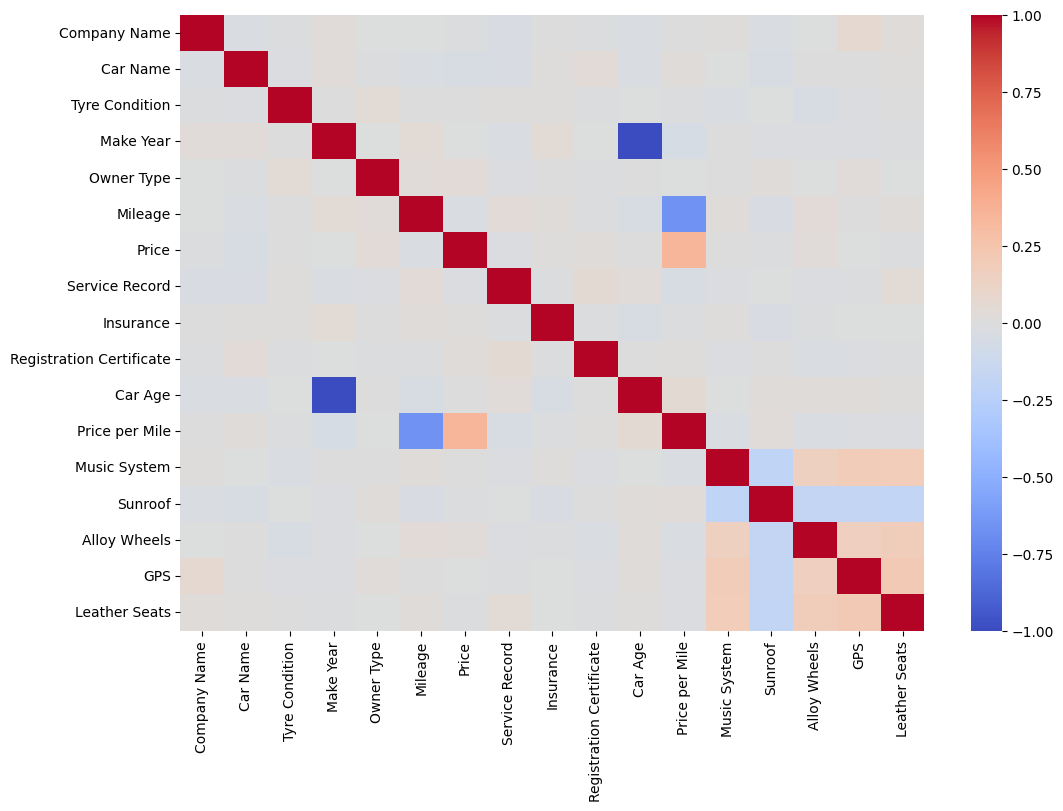

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

# Identify highly correlated features (correlation > 0.9)
threshold = 0.9
high_corr_features = [col for col in corr_matrix.columns if any(corr_matrix[col] > threshold) and col != 'Price']

# Drop highly correlated features
df.drop(columns=high_corr_features, inplace=True)


In [61]:
print(df.dtypes)


Price                                      int64
Variant_GT                                  bool
Variant_Highline                            bool
Variant_LE                                  bool
Variant_RXE                                 bool
Variant_SE                                  bool
Variant_SL                                  bool
Variant_XL                                  bool
Variant_ZXI                                 bool
Fuel Type_Diesel                            bool
Fuel Type_Petrol                            bool
Transmission Type_Automatic (Tiptronic)     bool
Transmission Type_Manual                    bool
Body Color_Blue                             bool
Body Color_Gold                             bool
Body Color_Grey                             bool
Body Color_Maroon                           bool
Body Color_Red                              bool
Body Color_Silver                           bool
Body Color_White                            bool
dtype: object


In [62]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the 'Price' column
df['Price'] = scaler.fit_transform(df[['Price']])


# Train_ Test Split

In [63]:
# Define features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


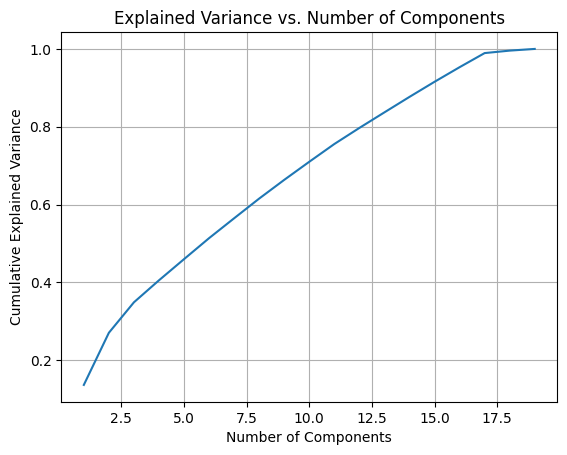

In [64]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(X_train)  # Fit PCA on training data
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()


In [65]:
from sklearn.decomposition import PCA

# Keep 10 principal components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [66]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df)

# Convert back to DataFrame
df_pca = pd.DataFrame(df_pca)

# Confirm shape
df_pca.shape


(2500, 17)

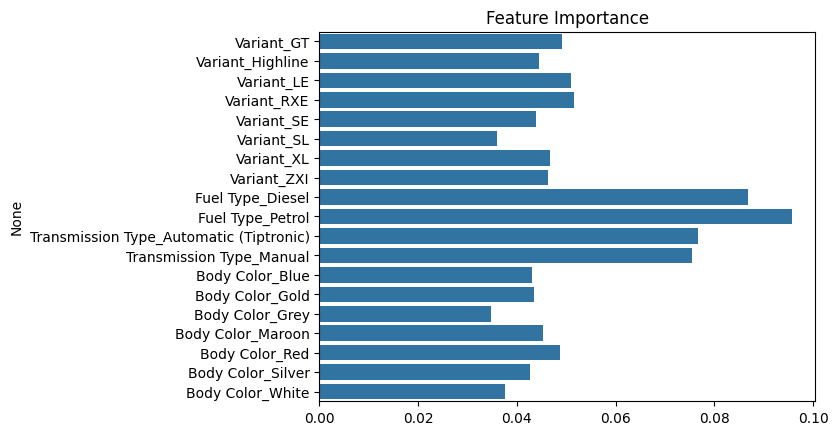

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_model.feature_importances_
sns.barplot(x=feature_importances, y=X_train.columns)
plt.title("Feature Importance")
plt.show()


In [72]:
# Create a DataFrame to match feature names with their importance scores
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# Sort features by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the feature importances
print(feature_importance_df)


                                    Feature  Importance
9                          Fuel Type_Petrol    0.095700
8                          Fuel Type_Diesel    0.086922
10  Transmission Type_Automatic (Tiptronic)    0.076714
11                 Transmission Type_Manual    0.075558
3                               Variant_RXE    0.051557
2                                Variant_LE    0.051063
0                                Variant_GT    0.049186
16                           Body Color_Red    0.048767
6                                Variant_XL    0.046669
7                               Variant_ZXI    0.046396
15                        Body Color_Maroon    0.045351
1                          Variant_Highline    0.044558
4                                Variant_SE    0.043975
13                          Body Color_Gold    0.043563
12                          Body Color_Blue    0.043161
17                        Body Color_Silver    0.042705
18                         Body Color_White    0

In [68]:
df['Price'].describe()


,Price
count,2.500000e+03
mean,-1.136868e-16
std,1.000200e+00
min,-1.765919e+00
25%,-8.671918e-01
50%,1.684604e-02
75%,8.503795e-01
max,1.695620e+00


In [84]:
# Select only the top 8 most important features
top_features = [
    "Fuel Type_Petrol", "Fuel Type_Diesel",
    "Transmission Type_Automatic (Tiptronic)", "Transmission Type_Manual",
    "Variant_RXE", "Variant_LE", "Variant_GT", "Body Color_Red"
]

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


# Model Selection and Evaluation

In [69]:
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Train Linear Regression model
# lr = LinearRegression()
# lr.fit(X_train, y_train)
# y_pred_lr = lr.predict(X_test)

# # Train Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)

# # Evaluate models
# def evaluate_model(y_true, y_pred, model_name):
#     print(f"{model_name} Performance:")
#     print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.2f}")
#     print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.2f}")
#     # print(f"Root Mean Squared Error: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
#     print("-" * 50)

# evaluate_model(y_test, y_pred_lr, "Linear Regression")
# evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression Performance:
Mean Absolute Error: 0.89
Mean Squared Error: 1.04
--------------------------------------------------
Random Forest Performance:
Mean Absolute Error: 0.96
Mean Squared Error: 1.31
--------------------------------------------------


In [101]:
# Train Random Forest with selected features
rf_model_selected = RandomForestRegressor(n_estimators=10,max_depth=3, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = rf_model_selected.predict(X_test_selected)


In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred_selected)
mse = mean_squared_error(y_test, y_pred_selected)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


Mean Absolute Error: 0.8921
Mean Squared Error: 1.0426


In [70]:
print(y_train.describe())


count    2000.000000
mean        0.008822
std         0.995236
min        -1.765919
25%        -0.836060
50%         0.034655
75%         0.863631
max         1.695620
Name: Price, dtype: float64


# Hyperparameter tuning

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=10, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train_selected, y_train)

y_pred_gb = gb_model.predict(X_test_selected)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f"Gradient Boosting - MAE: {mae_gb:.4f}, MSE: {mse_gb:.4f}")


Gradient Boosting - MAE: 0.8913, MSE: 1.0391
